## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step


In [0]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

### Find no.of samples are there in training and test datasets

In [7]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [9]:
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
from keras.utils import np_utils

In [15]:
import pandas as pd
y_train_num = pd.Series(y_train).value_counts()
y_train_num

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [17]:
y_test_num = pd.Series(y_test).value_counts()
y_test_num

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [0]:
y_train_num = np_utils.to_categorical(y_train, 10)
y_test_num = np_utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D

T### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [49]:
 # Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]
    # Train the model2
    model2.fit(x_train, y_train_num, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test_num), callbacks=callback_list)

    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 168us/step - loss: 0.7638 - acc: 0.7218 - val_loss: 0.5991 - val_acc: 0.7694
Epoch 2/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.5285 - acc: 0.8055 - val_loss: 0.5335 - val_acc: 0.8082
Epoch 3/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.4770 - acc: 0.8266 - val_loss: 0.4773 - val_acc: 0.8289
Epoch 4/10
60000/60000 [==============================] - 9s 157us/step - loss: 0.4447 - acc: 0.8407 - val_loss: 0.4621 - val_acc: 0.8374
Epoch 5/10
60000/60000 [==============================] - 10s 158us/step - loss: 0.4212 - acc: 0.8491 - val_loss: 0.4413 - val_acc: 0.8368
Epoch 6/10
60000/60000 [==============================] - 9s 155us/step - loss: 0.4060 - acc: 0.8533 - val_loss: 0.4413 - val_acc: 0.8389
Epoch 7/10
60000/60000 [==============================] - 9s 154us/step - loss: 0.3889 - acc: 0.8594 - val_loss: 0.4016 

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [50]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train_num, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test_num), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.7861 - acc: 0.7061 - val_loss: 0.5976 - val_acc: 0.7652
Epoch 2/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.5459 - acc: 0.7951 - val_loss: 0.5421 - val_acc: 0.7919
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.5034 - acc: 0.8117 - val_loss: 0.4721 - val_acc: 0.8324
Epoch 4/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.4705 - acc: 0.8243 - val_loss: 0.4474 - val_acc: 0.8395
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.4429 - acc: 0.8361 - val_loss: 0.4582 - val_acc: 0.8210
Epoch 6/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4207 - acc: 0.8437 - val_loss: 0.4358 - val_acc: 0.8376
Epoch 7/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.3961 - acc: 0.8541 - val_loss: 0.4066 -

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

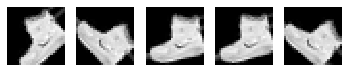

In [52]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [53]:
model3.fit_generator(datagen.flow(x_train, y_train_num,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test_num), callbacks=callback_list)

Epoch 1/10
  15/1875 [..............................] - ETA: 21s - loss: 1.8231 - acc: 0.4250

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 19s 10ms/step - loss: 0.6835 - acc: 0.7489 - val_loss: 0.4153 - val_acc: 0.8572
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5394 - acc: 0.8035 - val_loss: 0.4078 - val_acc: 0.8612
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5031 - acc: 0.8175 - val_loss: 0.3928 - val_acc: 0.8668
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4749 - acc: 0.8290 - val_loss: 0.4132 - val_acc: 0.8572
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4547 - acc: 0.8354 - val_loss: 0.3908 - val_acc: 0.8658
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4427 - acc: 0.8383 - val_loss: 0.3755 - val_acc: 0.8700
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4324 - acc: 0.8424 - val_loss: 0.3805 - val_acc: 0.8687
Epoch 8/10
1875/1875 [==============================] - 18s

###  Report the final train and validation accuracy

In [54]:
loss_and_metrics = model3.evaluate(x_train, y_train_num)
print(loss_and_metrics)

60000/60000 [==============================] - 3s 51us/step
[0.32532964313328266, 0.8854833333333333]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
#already explained above

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [0]:
import tensorflow as tf


In [7]:
tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.01,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.01,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

In [0]:
import matplotlib.pyplot as plt

[]

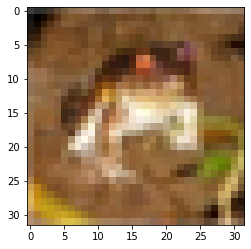

In [15]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

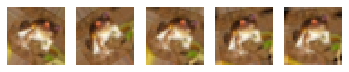

In [25]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):    
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()